In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [99]:
df = pd.read_csv("/dataset/credit_card_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Type_Occupation  1060 non-null   object 
 13  Family_Members   1548 non-null   int64  
 14  Rejected         1548 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 181.5+ KB


In [100]:
#since we dont require the ind_id column

df = df.drop("Ind_ID", axis=1)
df.sample(10)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,Rejected
1181,F,N,Y,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22655.0,365243,NaN,2,1
887,F,N,N,1,202500.0,Working,Secondary / secondary special,Married,House / apartment,-12047.0,-3443,Managers,3,0
1530,F,Y,Y,1,135000.0,Commercial associate,Higher education,Married,House / apartment,-11278.0,-2481,NaN,3,0
1209,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20570.0,365243,NaN,2,0
703,F,Y,Y,0,315000.0,Working,Higher education,Married,House / apartment,-21377.0,-577,NaN,2,0
658,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Separated,House / apartment,-16211.0,-1406,Laborers,1,0
30,F,N,N,0,198000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-22002.0,365243,NaN,1,0
364,F,N,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15145.0,-3654,Managers,2,0
1308,F,N,N,0,112500.0,Working,Higher education,Single / not married,Co-op apartment,-12788.0,-531,Core staff,1,0
22,F,Y,N,0,99000.0,Working,Secondary / secondary special,Married,House / apartment,-14657.0,-4392,Core staff,2,0


In [101]:
#checking duplicate and null values
print("Duplicate rows: ", df.duplicated().sum())
print("Null Values: ", df.isnull().sum())

#dropping duplicate values
df = df.drop_duplicates()
print("After deleting duplicate rows: ", df.duplicated().sum())

Duplicate rows:  162
Null Values:  GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Type_Occupation    488
Family_Members       0
Rejected             0
dtype: int64
After deleting duplicate rows:  0


In [102]:
#replacing irrelevant values
df['Marital_status'].unique()
df.Marital_status= df.Marital_status.replace('Civil marriage','Married')
df.Marital_status= df.Marital_status.replace('Widow','Separated')
df.Marital_status= df.Marital_status.replace('Single / not married','Single')

In [103]:
#creating a new column with age
df['Age'] = np.abs((df['Birthday_count'])/365)

In [104]:
#converting employed days to experience in YEARS
df['Work_experience']= np.abs(df['Employed_days'])/365

In [105]:
#filling missing values in Gender by most populated values
df['GENDER'].fillna(value=df['GENDER'].mode()[0], inplace=True)
df['GENDER'].value_counts()

F    879
M    507
Name: GENDER, dtype: int64

In [106]:
#filling missing values in annual income by using the calculated mean of each type
df['Annual_income'].fillna(df.groupby('Type_Income')['Annual_income'].transform('mean'), inplace=True)

In [107]:
#filling missing values in age by calculating mean using the income type
df['Age'].fillna(df.groupby('Type_Income')['Age'].transform('mean'), inplace=True)
df.isnull().sum()

GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Type_Occupation    438
Family_Members       0
Rejected             0
Age                  0
Work_experience      0
dtype: int64

In [108]:
#since there is alot of missing values in the type_occupation
#instead of dropping the values (rows) we will be dropping the the whole column
#along with the birthday counts and employed days that we already converted

df.drop(columns = ['Type_Occupation', 'Birthday_count', 'Employed_days'] , inplace = True, axis = 1)
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Rejected,Age,Work_experience
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,2,1,51.430137,1000.665753
1,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,4,0,43.180822,8.693151
2,F,N,Y,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,1,0,46.619178,3.690411
3,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,2,0,27.197260,2.268493
4,F,N,Y,2,216000.0,State servant,Higher education,Married,House / apartment,4,0,42.312329,8.526027


In [109]:
#Binary Encoding
df['GENDER'] = df['GENDER'].map({'M':1,'F':0})
df['Car_Owner'] = df['Car_Owner'].map({'Y':1,'N':0})
df['Propert_Owner'] = df['Propert_Owner'].map({'Y':1,'N':0})

df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Rejected,Age,Work_experience
0,1,1,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,2,1,51.430137,1000.665753
1,0,1,1,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,4,0,43.180822,8.693151
2,0,0,1,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,1,0,46.619178,3.690411
3,1,1,1,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,2,0,27.197260,2.268493
4,0,0,1,2,216000.0,State servant,Higher education,Married,House / apartment,4,0,42.312329,8.526027


In [110]:
#mapping education by ranks - 1, 2, 3, 4

education_mapping = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}

df['EDUCATION'] = df['EDUCATION'].map(education_mapping)

### Visualization

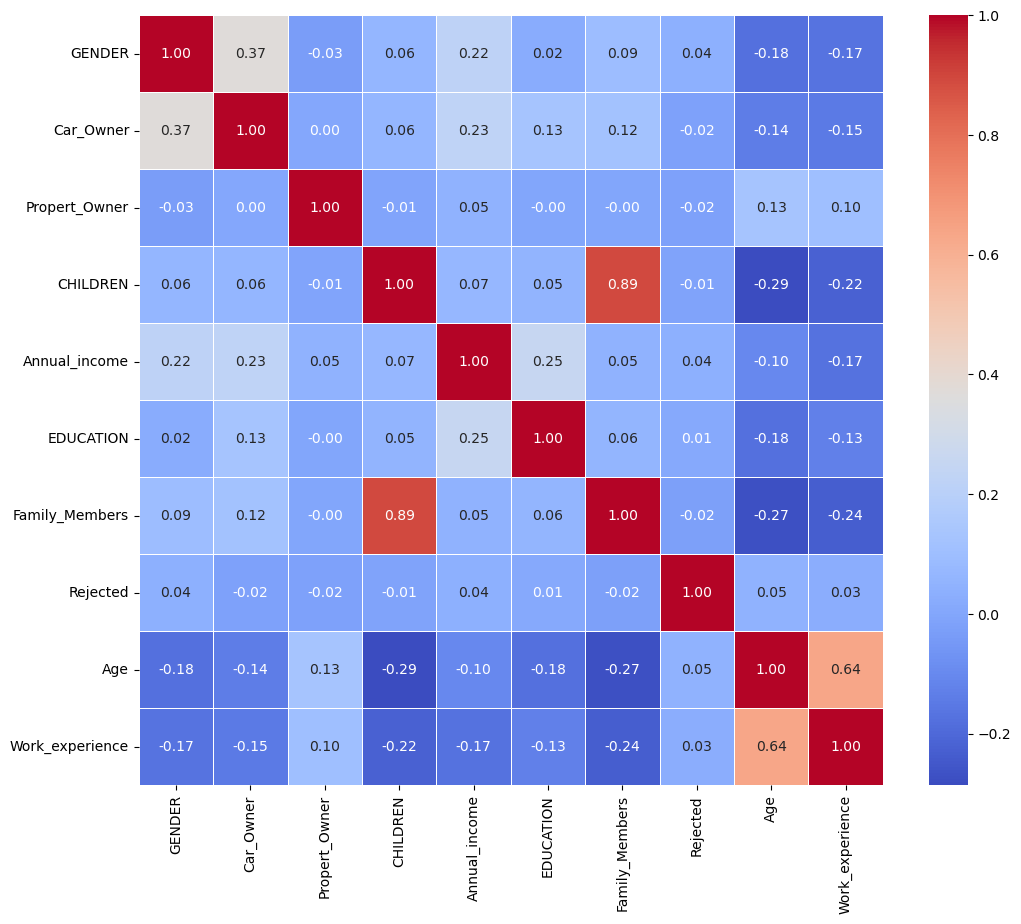

In [111]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

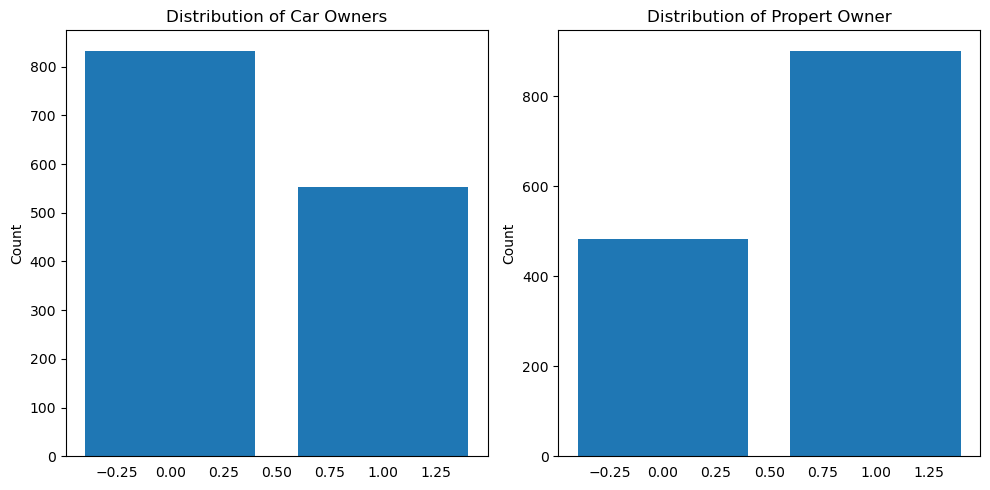

In [112]:
# cols = ['Car_Owner', 'Propert_Owner']

# # Set up the figure and axes
# fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# # Plot univariate distributions for each column
# for col, ax in zip(cols, axes):
#     values, counts = df[col].value_counts().index, df[col].value_counts().values
#     ax.bar(values, counts, color='skyblue')
#     ax.set_title(f'Distribution of {col}', fontsize=18)
#     ax.set_ylabel('Count')
#     ax.tick_params(axis='x')

# plt.tight_layout()
# plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(df['Car_Owner'].value_counts().index, df['Car_Owner'].value_counts().values)
plt.title('Distribution of Car Owners')
plt.ylabel('Count')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

plt.subplot(1, 2, 2)
plt.bar(df['Propert_Owner'].value_counts().index, df['Propert_Owner'].value_counts().values)
plt.title('Distribution of Propert Owner')
plt.ylabel('Count')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

plt.tight_layout()
plt.show()

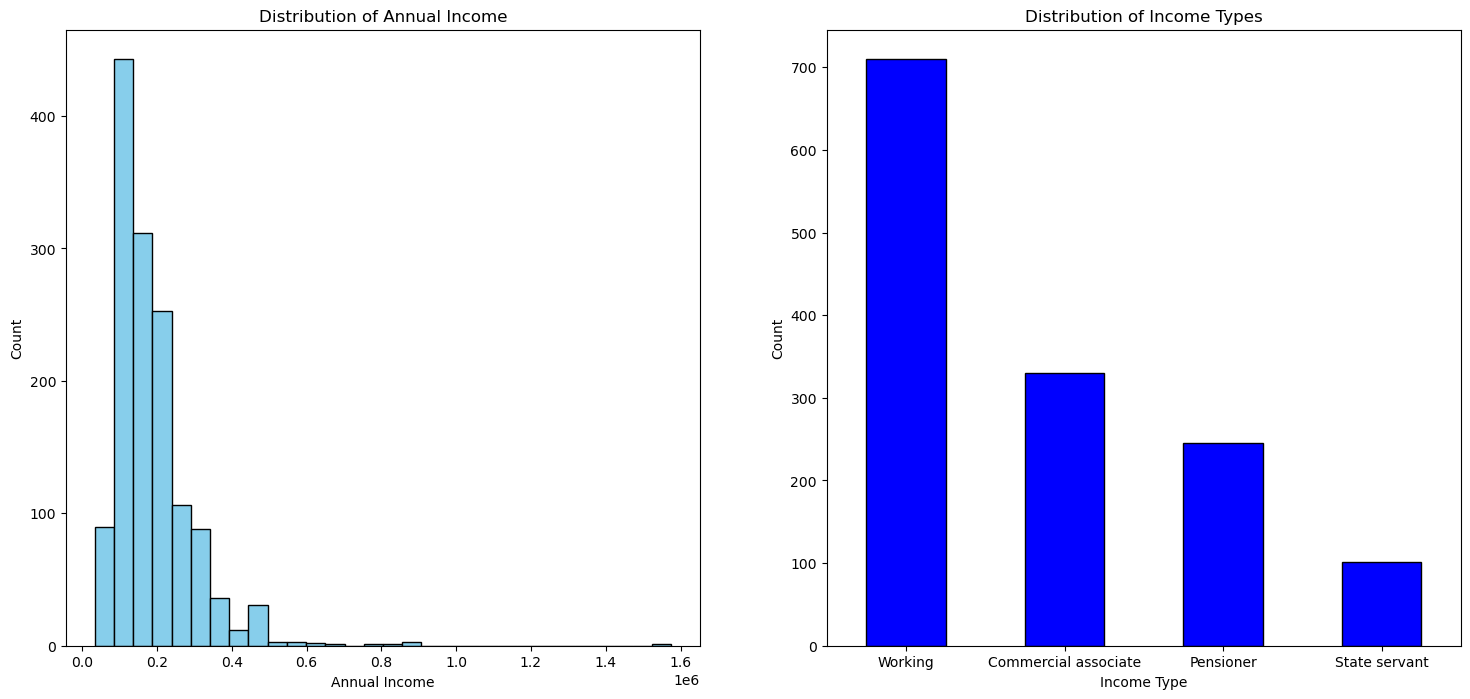

In [113]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.hist(df['Annual_income'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['Type_Income'].value_counts().plot(kind='bar', color='blue', edgecolor='black')
plt.title('Distribution of Income Types')
plt.xlabel('Income Type')
plt.xticks(rotation = 0)
plt.ylabel('Count')

plt.show()

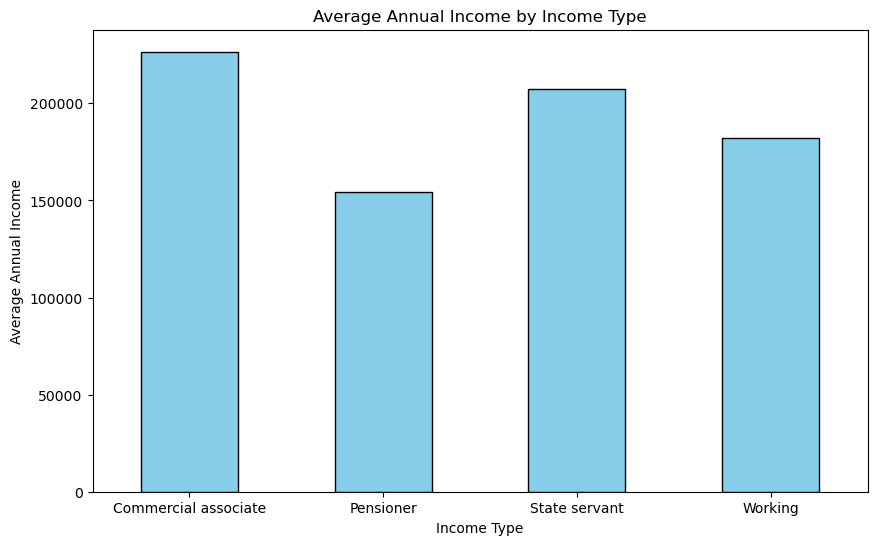

In [114]:
income_grouped = df.groupby('Type_Income')['Annual_income'].mean()

# Plot the grouped bar plot
plt.figure(figsize=(10, 6))
income_grouped.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Annual Income by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Average Annual Income')
plt.xticks(rotation = 0)

plt.show()

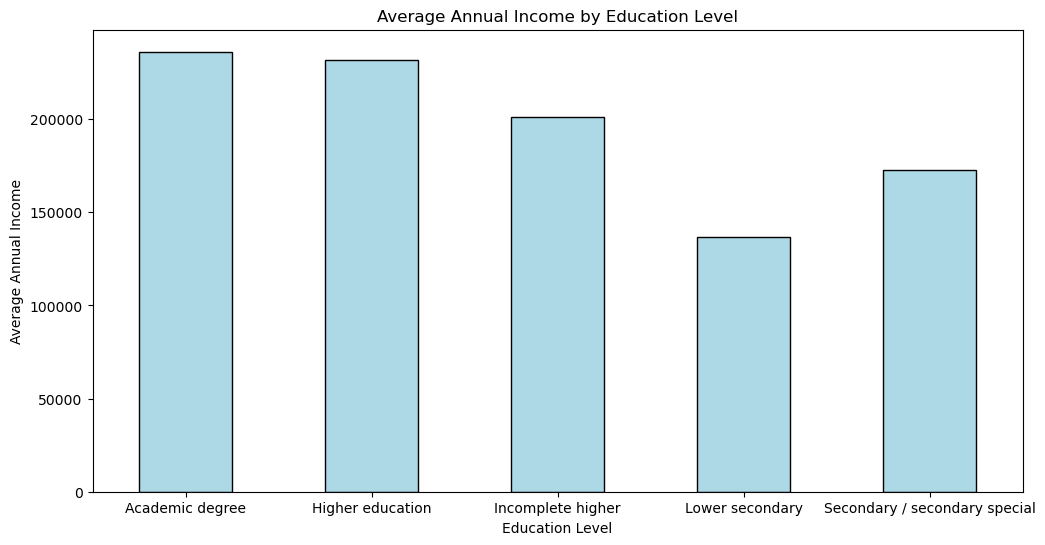

In [115]:
#had to remap to its original form, just to plot it
education_mapping = {
    0: 'Lower secondary',
    1: 'Secondary / secondary special',
    2: 'Incomplete higher',
    3: 'Higher education',
    4: 'Academic degree',
}

df_ed = df.copy() #making a copy
df_ed['EDUCATION'] = df['EDUCATION'].map(education_mapping) #remapping

education_grouped = df_ed.groupby('EDUCATION')['Annual_income'].mean()

# Plot the grouped bar plot
plt.figure(figsize=(12, 6))
education_grouped.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Average Annual Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Annual Income')
plt.xticks(rotation = 0)

plt.show()

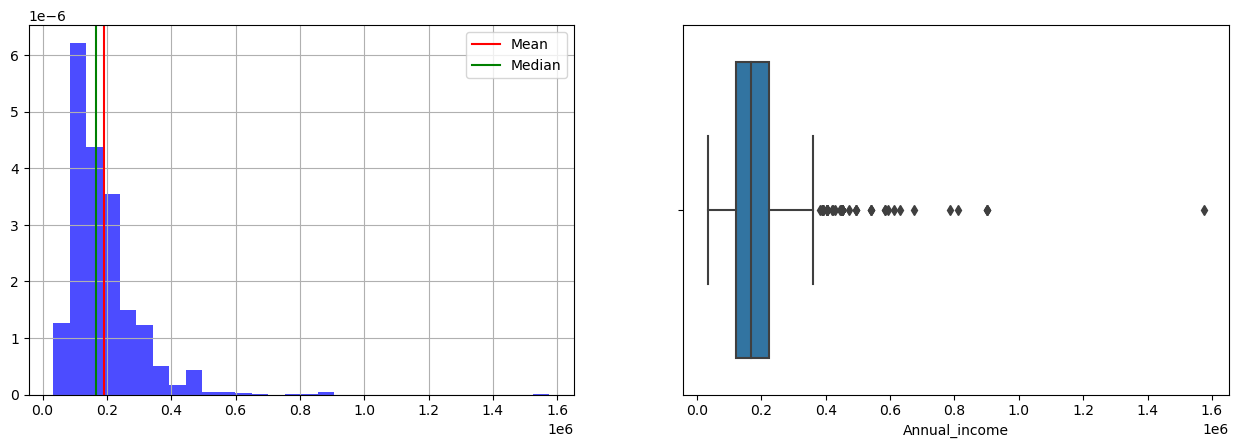

In [116]:
#Annual Income before treating the outliers
plt.subplot(1,2,1)
plt.hist(df['Annual_income'], bins=30, color='blue', density=True, alpha=0.7)
plt.axvline(x=np.mean(df['Annual_income']), color="red", label="Mean")
plt.axvline(x=np.median(df['Annual_income']), color="green", label="Median")
plt.grid()
plt.legend()

plt.subplot(1,2,2)  # nrows=1, ncols=2
sns.boxplot(data=df, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.show()

In [117]:
#function for treating outliers
def treating_outliers(col, df):
    Q1 = np.percentile(df[col], 25 , interpolation='midpoint')
    Q3 = np.percentile(df[col], 75 ,interpolation='midpoint')

    IQR = Q3-Q1

    upper_limit = Q3 + 1.5 * IQR
    upper_limit
    return df[df[col] < upper_limit]

In [118]:
df = treating_outliers('Work_experience', df)
df = treating_outliers('Annual_income', df)

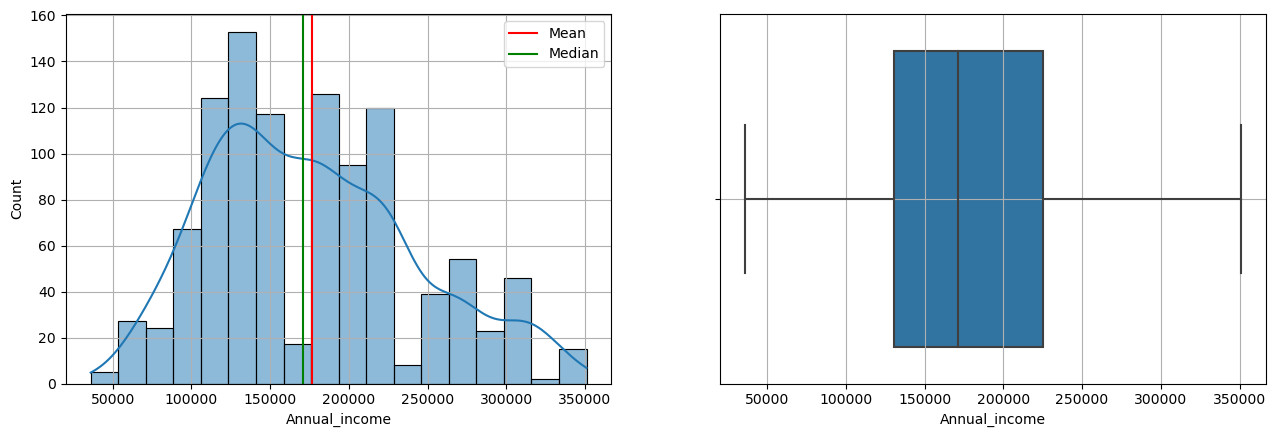

In [119]:
#Annual income after treating the outliers
plt.subplot(1,2,1)
sns.histplot(data=df, x='Annual_income',kde=True)
plt.axvline(x=df['Annual_income'].mean(),color="red",label="Mean")
plt.axvline(x=df['Annual_income'].median(),color="green",label="Median")
plt.grid()
plt.legend()

plt.subplot(1,2,2)  # nrows=1, ncols=2
sns.boxplot(data=df, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

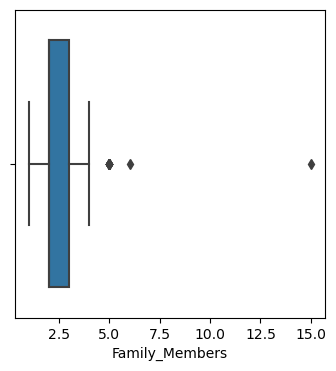

In [120]:
#family members is a different case with one particular outlier
plt.figure(figsize = (4,4))
sns.boxplot(data = df , x = 'Family_Members')
plt.show()

In [121]:
df = df[df['Family_Members'] < 6] #setting an upper limit manually

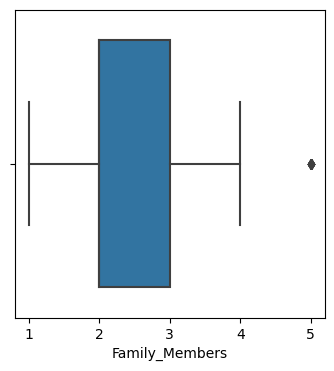

In [122]:
plt.figure(figsize = (4,4))
sns.boxplot(data = df , x = 'Family_Members')
plt.show()

In [123]:
#one hot encoding - converts categorical variables into a binary matrix of each category
df = pd.get_dummies(df, columns=['Type_Income','Marital_status','Housing_type'],drop_first=True)  #drop_first to avoid multicolinearity

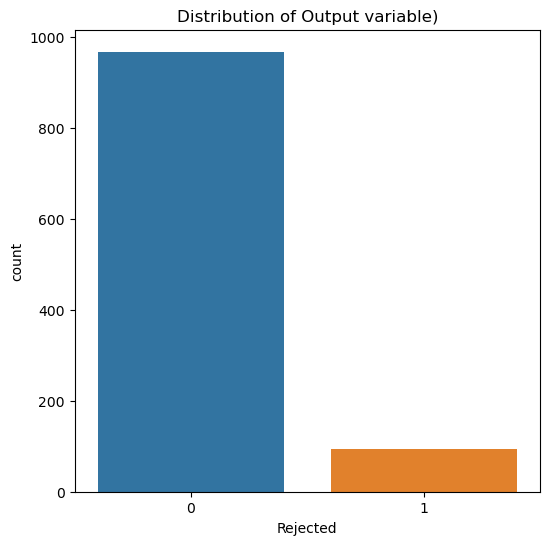

In [124]:
#we have a highly imbalanced data
plt.figure(figsize = (6, 6))
sns.countplot(data = df, x = 'Rejected')
plt.title("Distribution of Output variable)")
plt.show()

In [125]:
df['Rejected'].value_counts()

0    967
1     93
Name: Rejected, dtype: int64

In [126]:
def performing_smote(X, Y, k=5, oversample_ratio=1.0):
    # Separate minority and majority classes
    minority_class = X[Y == 1]
    majority_class = X[Y == 0]

    # Calculate the number of samples to generate
    num_samples = int(len(minority_class) * oversample_ratio)

    # Randomly select samples from the minority class
    random_indices = np.random.choice(len(minority_class), num_samples, replace=True)
    minority_samples = minority_class[random_indices]

    # Compute Euclidean distances between minority samples
    distances = np.linalg.norm(minority_samples[:, np.newaxis, :] - minority_class, axis=2)

    # Find k-nearest neighbors
    nearest_neighbors_indices = np.argpartition(distances, k, axis=1)[:, :k]

    # Generate synthetic samples
    synthetic_samples = []
    for i, neighbors in enumerate(nearest_neighbors_indices):
        for _ in range(int(oversample_ratio)):
            neighbor = minority_class[neighbors[np.random.randint(k)]]
            alpha = np.random.rand()
            synthetic_sample = minority_samples[i] + alpha * (neighbor - minority_samples[i])
            synthetic_samples.append(synthetic_sample)

    # Combine minority samples, majority samples, and synthetic samples
    oversampled_X = pd.DataFrame(np.vstack((X, np.array(synthetic_samples))))
    oversampled_Y = pd.DataFrame(np.hstack((Y, np.ones(len(synthetic_samples)))))

    return oversampled_X, oversampled_Y

In [127]:
X = df.drop(columns=['Rejected']).to_numpy()
Y = df['Rejected'].to_numpy()

Xos, Yos = performing_smote(X, Y, k=5, oversample_ratio=3.14)

In [130]:
Yos.value_counts()

1.0    969
0.0    967
dtype: int64

In [131]:
split = int(len(X) * 0.8)

X_train, X_test = X[:split], X[split:]
y_train, y_test = Y[:split], Y[split:]

In [132]:
resultsdf = pd.DataFrame()

In [133]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []

        for sample in X_test:
            distances = np.linalg.norm(self.X_train - sample, axis=1)
            nearest_neighbors_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_neighbors_indices]
            predicted_label = np.bincount(nearest_labels).argmax()
            predictions.append(predicted_label)

        return np.array(predictions)

In [134]:
knn = KNNClassifier(k=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)


accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2%}")

#adding accuracy to resultsdf
resultsdf['KNNClassifier'] = [accuracy]

Accuracy: 87.26%


In [135]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization_param=0.1):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization_param = regularization_param
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_cost(self, X, y):
        m = len(y)
        h = self._sigmoid(np.dot(X, self.weights) + self.bias)
        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        reg_term = (self.regularization_param / (2 * m)) * np.sum(self.weights**2)
        return cost + reg_term

    def _compute_gradients(self, X, y):
        m = len(y)
        h = self._sigmoid(np.dot(X, self.weights) + self.bias)
        error = h - y
        gradients = {
            'weights': (1 / m) * np.dot(X.T, error) + (self.regularization_param / m) * self.weights,
            'bias': np.sum(error) / m
        }
        return gradients

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.num_iterations):
            cost = self._compute_cost(X, y)
            gradients = self._compute_gradients(X, y)

            self.weights -= self.learning_rate * gradients['weights']
            self.bias -= self.learning_rate * gradients['bias']

    def predict(self, X):
        predictions = self._sigmoid(np.dot(X, self.weights) + self.bias)
        return (predictions >= 0.5).astype(int)

In [136]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Assuming X_test is your test data
predictions = model.predict(X_test)
predictions
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2%}")

resultsdf['Logistic Regression'] = [accuracy]

Accuracy: 89.62%


In [139]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.value = None  # For leaf nodes

    def fit(self, X, y, depth=0):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            if len(y) > 0:
                self.value = np.bincount(y).argmax()
            else:
                # Handle empty sequence
                self.value = None
            return

        m, n = X.shape
        min_gini = float('inf')

        for feature in range(n):
            unique_values = np.unique(X[:, feature])
            for value in unique_values:
                left_indices = X[:, feature] <= value
                right_indices = ~left_indices
                gini = self.calculate_gini(y[left_indices], y[right_indices])

                if gini < min_gini:
                    min_gini = gini
                    self.feature_index = feature
                    self.threshold = value

        if min_gini == float('inf'):
            if len(y) > 0:
                self.value = np.bincount(y).argmax()
            else:
                # Handle empty sequence
                self.value = None
            return

        left_mask = X[:, self.feature_index] <= self.threshold
        right_mask = ~left_mask

        self.left = DecisionTree(max_depth=self.max_depth)
        self.right = DecisionTree(max_depth=self.max_depth)

        self.left.fit(X[left_mask, :], y[left_mask], depth + 1)
        self.right.fit(X[right_mask, :], y[right_mask], depth + 1)

    def calculate_gini(self, left_labels, right_labels):
        left_size = len(left_labels)
        right_size = len(right_labels)
        total_size = left_size + right_size

        if left_size == 0 or right_size == 0:
            return 0

        left_gini = 1.0 - np.sum((np.sum(left_labels == c) / left_size) ** 2 for c in np.unique(left_labels))
        right_gini = 1.0 - np.sum((np.sum(right_labels == c) / right_size) ** 2 for c in np.unique(right_labels))

        return (left_size / total_size) * left_gini + (right_size / total_size) * right_gini

    def predict(self, X):
        if self.value is not None:
            return self.value

        if X[self.feature_index] <= self.threshold:
            return self.left.predict(X)
        else:
            return self.right.predict(X)
class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.estimators = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), len(X), replace=True)
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X[indices], y[indices])
            self.estimators.append(tree)

    def predict(self, X):
        predictions = [tree.predict(X) for tree in self.estimators]
        return np.bincount(predictions).argmax()

In [141]:
random_forest = RandomForest(n_estimators=100, max_depth=5)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
predictions = [random_forest.predict(x) for x in X_test]

# Evaluate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy * 100}%")

resultsdf['Random Forest Classifier'] = [accuracy]

Accuracy: 89.62264150943396%


In [142]:
resultsdf

,KNNClassifier,Logistic Regression,Random Forest Classifier
0,0.872642,0.896226,0.896226
